In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***Accessing dataset using Kaggle API***

*  Begin exploratory Analysis of data
*  Visualize images and more important features in order to start building the moldel.




In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 95% 141M/149M [00:00<00:00, 337MB/s]
100% 149M/149M [00:00<00:00, 341MB/s]


In [3]:
def get_class_paths(path):
  classes = []
  class_paths = []

  #Iteration through directories in the training set
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    #Check if it's a directory
    if os.path.isdir(label_path):
      print(f"Processing class: {label}")
      #Iteration through images in label directory
      for img in os.listdir(label_path):
        img_path = os.path.join(label_path, img)


        #Add each class and path to respective list
        classes.append(label)
        class_paths.append(img_path)


    #Create the dataframe with the data collected
  df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })
  print("Classes:", set(classes))
  print("Number of images:", len(class_paths))
  return df


In [4]:
#Training
tr_df = get_class_paths("/content/Training")

Processing class: notumor
Processing class: meningioma
Processing class: pituitary
Processing class: glioma
Classes: {'glioma', 'pituitary', 'notumor', 'meningioma'}
Number of images: 5712


In [5]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_0255.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0182.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0553.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0380.jpg,glioma


In [5]:
ts_df = get_class_paths("/content/Testing")
ts_df

Processing class: notumor
Processing class: meningioma
Processing class: pituitary
Processing class: glioma
Classes: {'glioma', 'pituitary', 'notumor', 'meningioma'}
Number of images: 1311


,Class Path,Class
0,/content/Testing/notumor/Te-no_0097.jpg,notumor
1,/content/Testing/notumor/Te-no_0301.jpg,notumor
2,/content/Testing/notumor/Te-noTr_0000.jpg,notumor
3,/content/Testing/notumor/Te-no_0222.jpg,notumor
4,/content/Testing/notumor/Te-no_0139.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0280.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0163.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0194.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0146.jpg,glioma


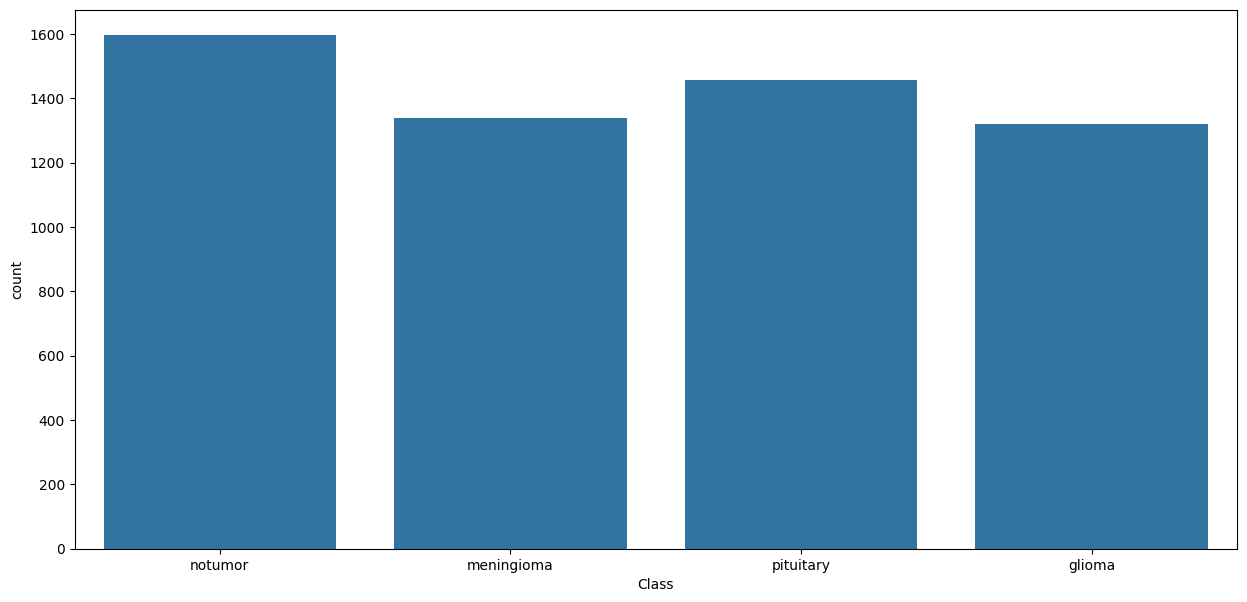

In [ ]:
#Barplot visialization of different types of classes and count
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

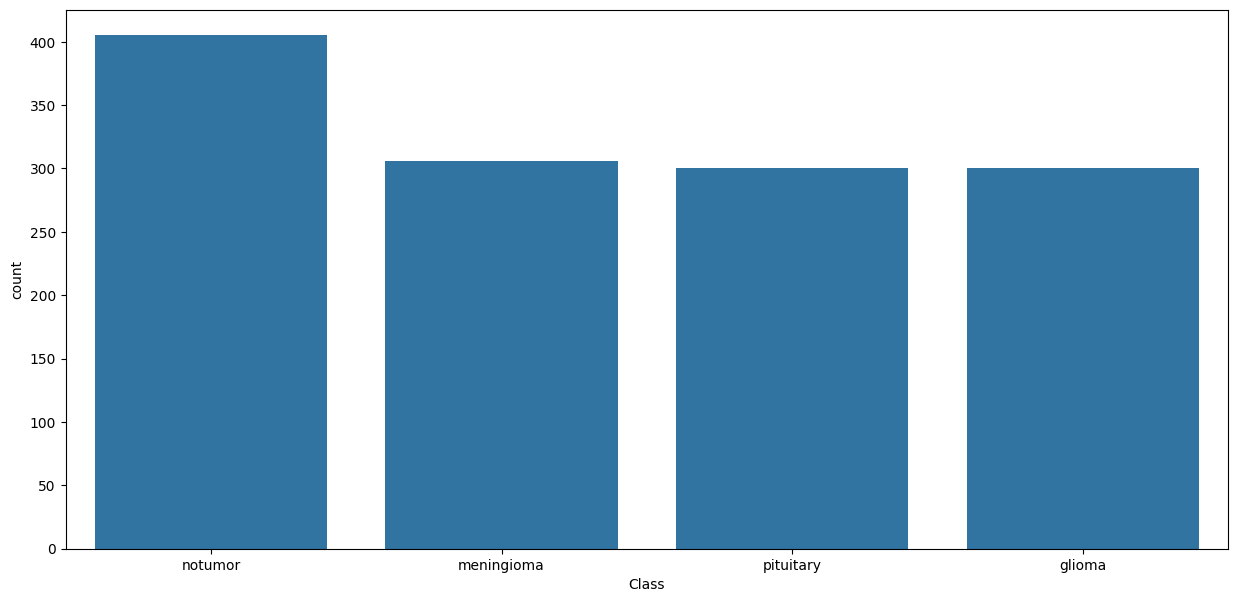

In [ ]:
#Same now for testing
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

# ***Splitting of data into train and test for Validation***

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:

valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])


In [ ]:
valid_df

,Class Path,Class
610,/content/Testing/meningioma/Te-me_0231.jpg,meningioma
253,/content/Testing/notumor/Te-no_0389.jpg,notumor
1040,/content/Testing/glioma/Te-gl_0068.jpg,glioma
1253,/content/Testing/glioma/Te-gl_0252.jpg,glioma
287,/content/Testing/notumor/Te-no_0033.jpg,notumor
...,...,...
254,/content/Testing/notumor/Te-no_0110.jpg,notumor
592,/content/Testing/meningioma/Te-me_0064.jpg,meningioma
798,/content/Testing/pituitary/Te-pi_0193.jpg,pituitary
644,/content/Testing/meningioma/Te-me_0028.jpg,meningioma


In [ ]:
ts_df

,Class Path,Class
525,/content/Testing/meningioma/Te-me_0181.jpg,meningioma
653,/content/Testing/meningioma/Te-me_0018.jpg,meningioma
1125,/content/Testing/glioma/Te-gl_0025.jpg,glioma
819,/content/Testing/pituitary/Te-pi_0093.jpg,pituitary
759,/content/Testing/pituitary/Te-pi_0120.jpg,pituitary
...,...,...
972,/content/Testing/pituitary/Te-pi_0287.jpg,pituitary
967,/content/Testing/pituitary/Te-pi_0064.jpg,pituitary
321,/content/Testing/notumor/Te-no_0252.jpg,notumor
320,/content/Testing/notumor/Te-no_0166.jpg,notumor


In [9]:
#Batch size num of img to process at once and resize of img
batch_size = 32

img_size = (299, 299)

img_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [10]:
# Load training data from a dataframe, specifying image path and class label columns, and create batches of images of the specified size.

#Training
tr_gen = img_generator.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size)

#Validation
valid_gen = img_generator.flow_from_dataframe(valid_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size)

#Testing
ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path', y_col='Class', batch_size=16, target_size=img_size, shuffle=False)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


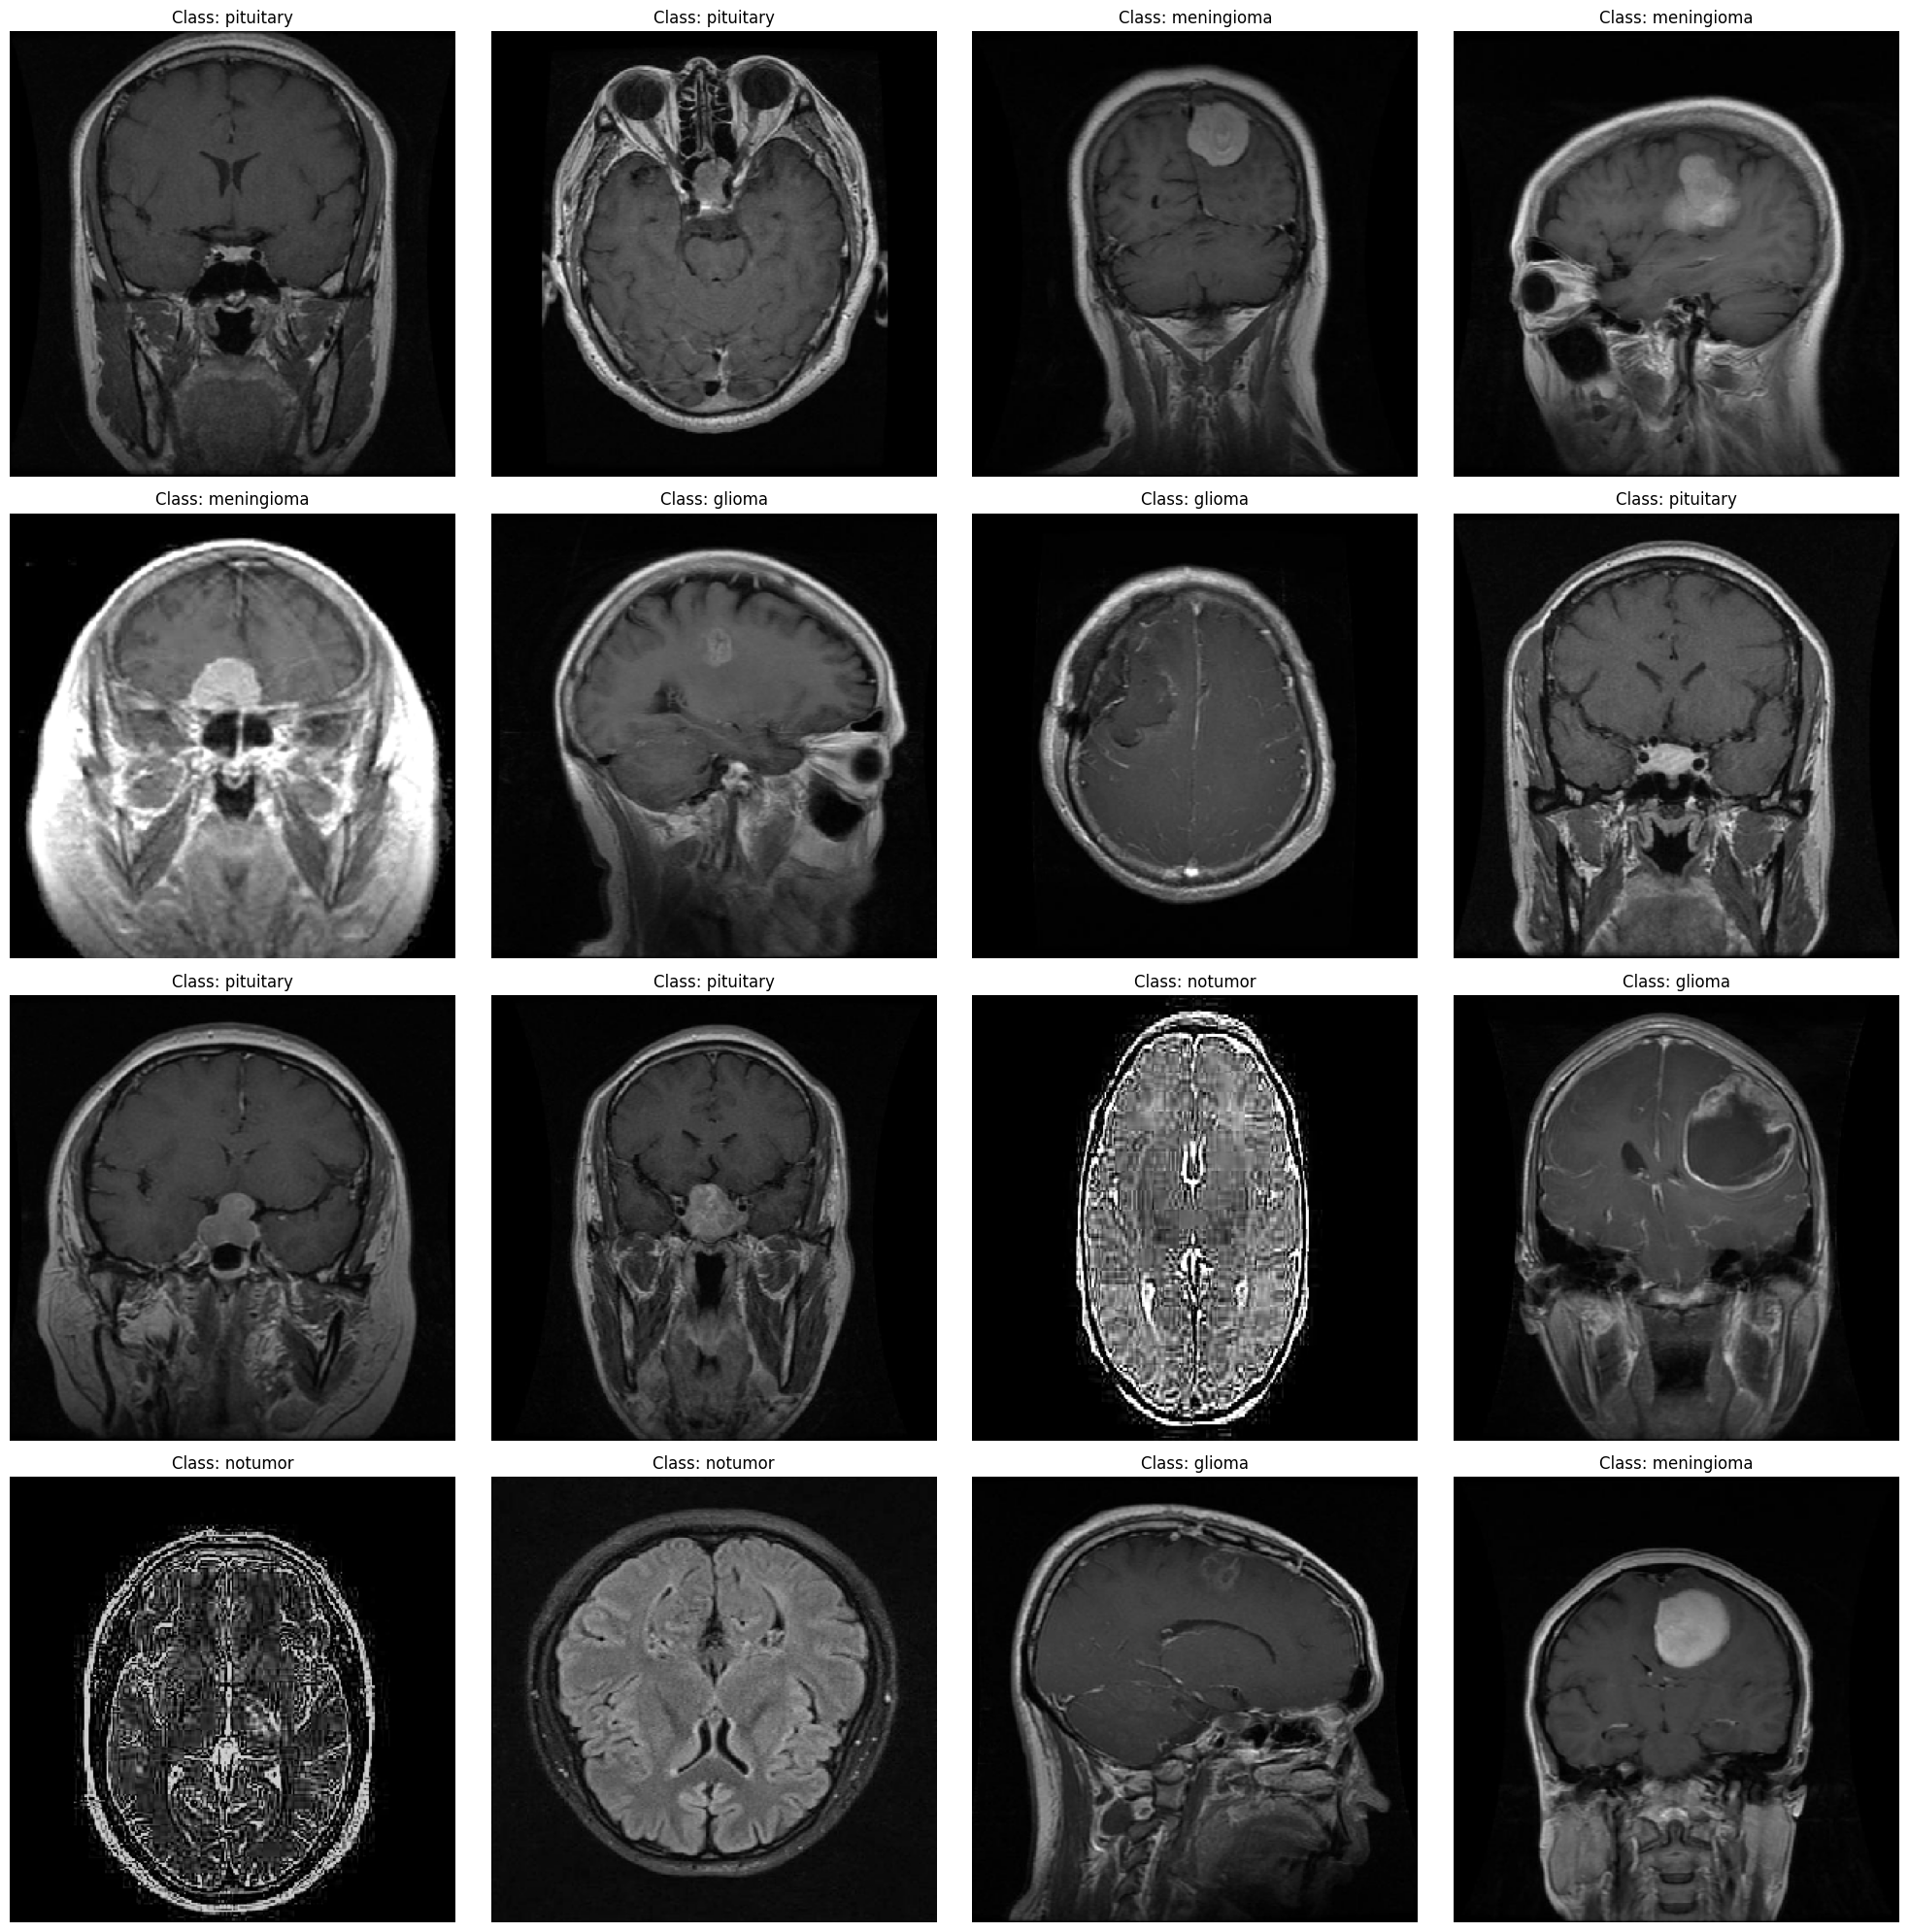

In [10]:
#Visualization of images

plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  #Get the class index
  class_index = np.argmax(label)

  #Get teh list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  #Find the index of teh class_index in the list of indices
  index_positions = class_indices.index(class_index)

  #Get the corresponding class name using idnex position
  class_name = class_names[index_positions]

  plt.title(f"Class: {class_name}")
  plt.axis("off")

plt.tight_layout()
plt.show()


In [11]:
#Base architecture of the model
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax') #->4 neurons for teh 4 diff classes
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [13]:
#Set parameters to the model
model.compile(Adamax(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy', Precision(), Recall()])

In [14]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 169s 594ms/step - accuracy: 0.8158 - loss: 0.5319 - precision_1: 0.8494 - recall_1: 0.7461 - val_accuracy: 0.9450 - val_loss: 0.2042 - val_precision_1: 0.9450 - val_recall_1: 0.9450
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 67s 368ms/step - accuracy: 0.9756 - loss: 0.0730 - precision_1: 0.9782 - recall_1: 0.9739 - val_accuracy: 0.9740 - val_loss: 0.0776 - val_precision_1: 0.9740 - val_recall_1: 0.9740
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 67s 368ms/step - accuracy: 0.9904 - loss: 0.0344 - precision_1: 0.9906 - recall_1: 0.9897 - val_accuracy: 0.9832 - val_loss: 0.0606 - val_precision_1: 0.9832 - val_recall_1: 0.9832
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 67s 367ms/step - accuracy: 0.9955 - loss: 0.0112 - precision_1: 0.9955 - recall_1: 0.9955 - val_accuracy: 0.9908 - val_loss: 0.0633 - val_precision_1: 0.9908 - val_recall_1: 0.9908
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 67s 367ms/step - accuracy: 0.9950 - loss: 0.0113 - precision_1: 0.9951 - recall_1: 0.9950 

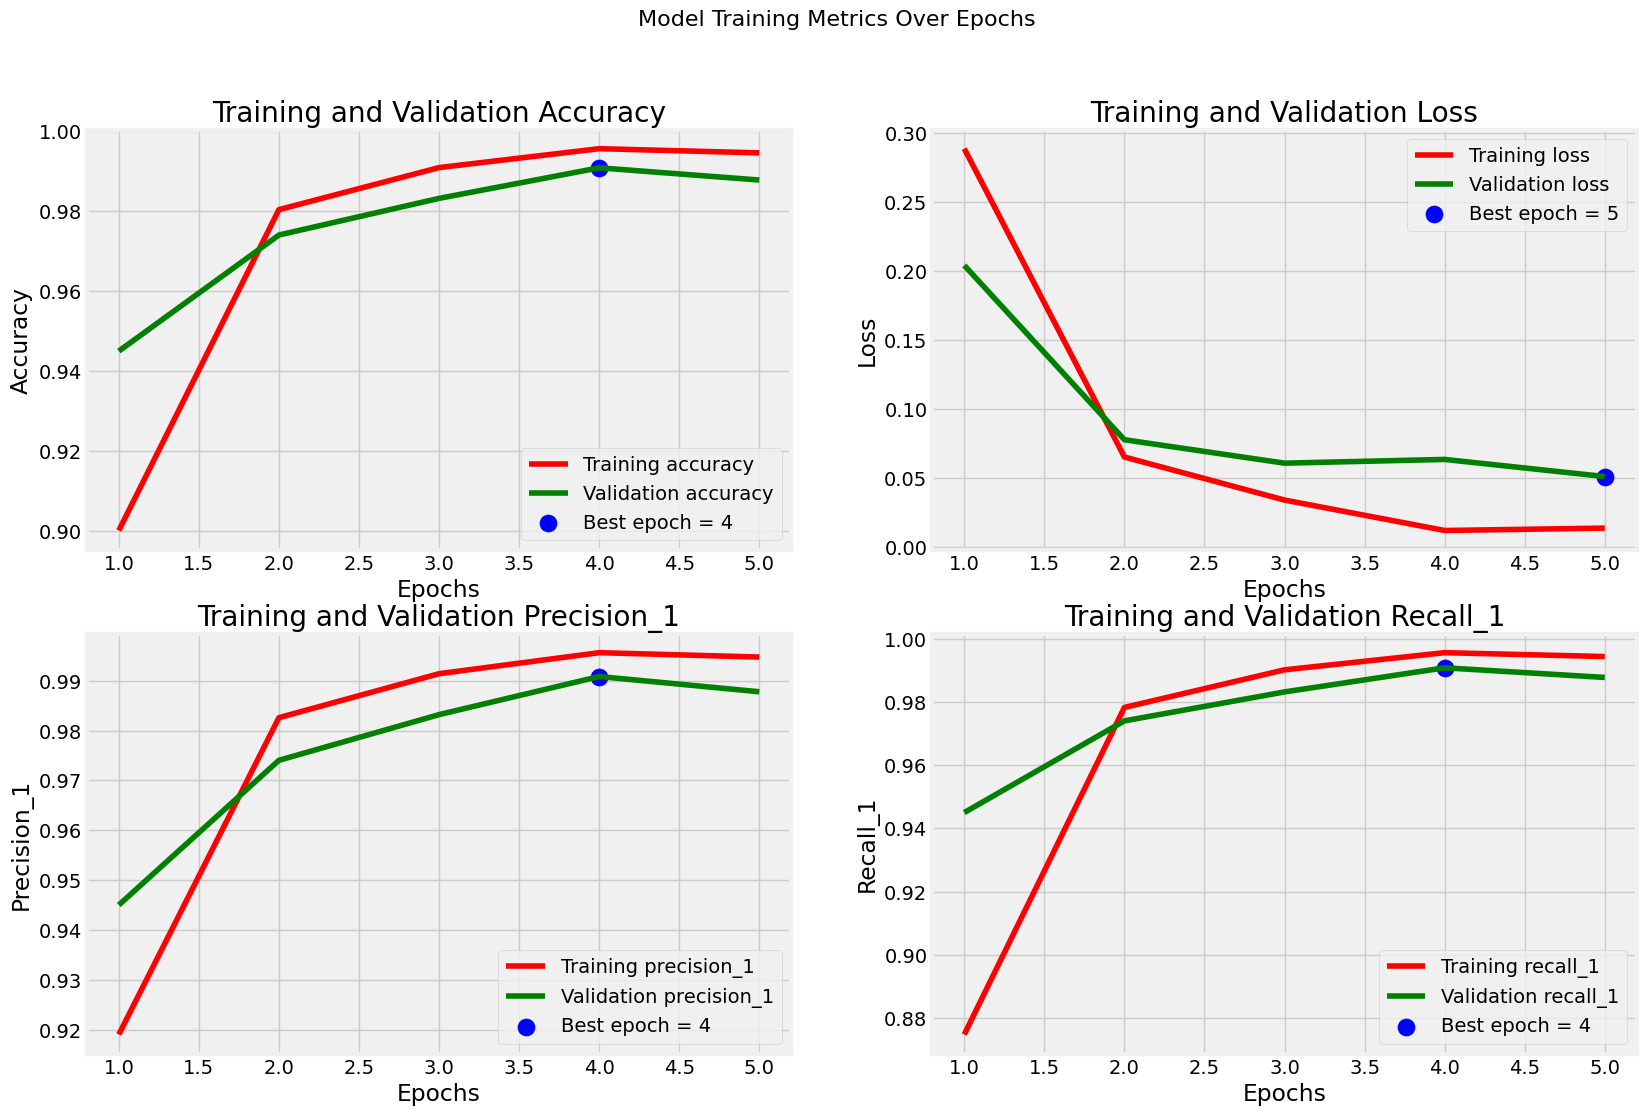

In [17]:
#Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

#Find the bets epochs and respective values
best_epochs = {}
best_values = {}
for m in metrics:
  if m =='loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#Plot the metrics restrived
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label = f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label = f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [18]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Training Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.9982 - loss: 0.0062 - precision_1: 0.9982 - recall_1: 0.9982
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.9840 - loss: 0.0347 - precision_1: 0.9840 - recall_1: 0.9840
 3/41 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 1.0000 - loss: 6.6640e-04 - precision_1: 1.0000 - recall_1: 1.0000 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9923 - loss: 0.0103 - precision_1: 0.9923 - recall_1: 0.9923
Training Accuracy: 99.93%
Train Loss: 0.0025
Validation Accuracy: 98.47%
Validation Loss: 0.0503


Test Accuracy: 99.24%
Test Loss: 0.0118


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step


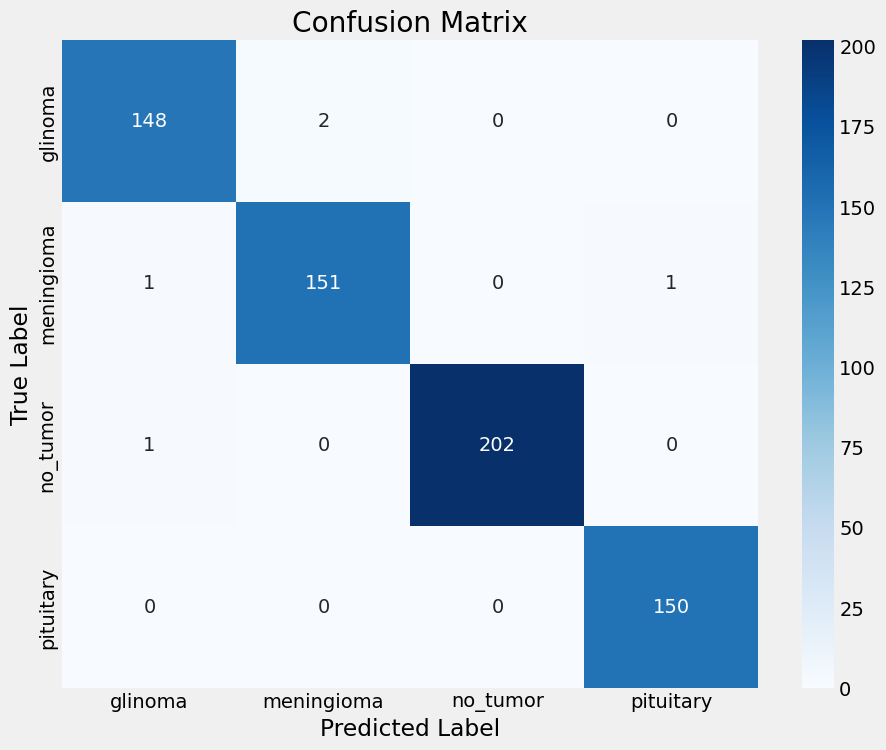

In [19]:
#Visualisation how model is perfomring
preds = model.predict(ts_gen)
#Convertion of prediction to actual labels -> getting us the highest prob to the diff labels
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glinoma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

#Display of confusion matrix

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.values())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
  #Get class labels
  labels = list(class_dict.keys())

  #Create Figure
  plt.figure(figsize=(6, 8))

  #Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  #Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  #Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  #Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted; {predicted_class}")

  #Plot prediction probabilities
  plt.subplot(2,1,2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class propabilities")

  # Add probability labes to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

In [ ]:
model.save_weights("xception_model.weights.h5")

# ***RESNET***

In [11]:
# Base architecture of the model
img_shape = (299, 299, 3)  # Match the desired input shape for ResNet50

base_model = tf.keras.applications.ResNet50(
    include_top=False,  # Exclude fully connected layers
    weights="imagenet",  # Use pretrained weights
    input_shape=img_shape,
    pooling='max'  # Global max pooling
)

# Define the custom model
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')  # 4 output neurons for 4 classes
])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

In [13]:
history_1 = model.fit(tr_gen, epochs=10, validation_data=valid_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 489ms/step - accuracy: 0.7531 - loss: 2.7357 - precision: 0.7675 - recall: 0.7422 - val_accuracy: 0.2336 - val_loss: 1.8902 - val_precision: 0.2336 - val_recall: 0.2336
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 52s 283ms/step - accuracy: 0.9284 - loss: 0.2873 - precision: 0.9370 - recall: 0.9206 - val_accuracy: 0.3038 - val_loss: 2.5708 - val_precision: 0.3106 - val_recall: 0.2718
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 52s 284ms/step - accuracy: 0.9656 - loss: 0.1124 - precision: 0.9698 - recall: 0.9624 - val_accuracy: 0.3053 - val_loss: 3.6363 - val_precision: 0.3029 - val_recall: 0.2992
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 52s 283ms/step - accuracy: 0.9680 - loss: 0.0981 - precision: 0.9692 - recall: 0.9654 - val_accuracy: 0.5115 - val_loss: 1.7270 - val_precision: 0.5387 - val_recall: 0.4779
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 52s 283ms/step - accuracy: 0.9784 - loss: 0.0751 - precision: 0.9802 - recall: 0.9783 - val_accuracy: 0.8137 - val_los

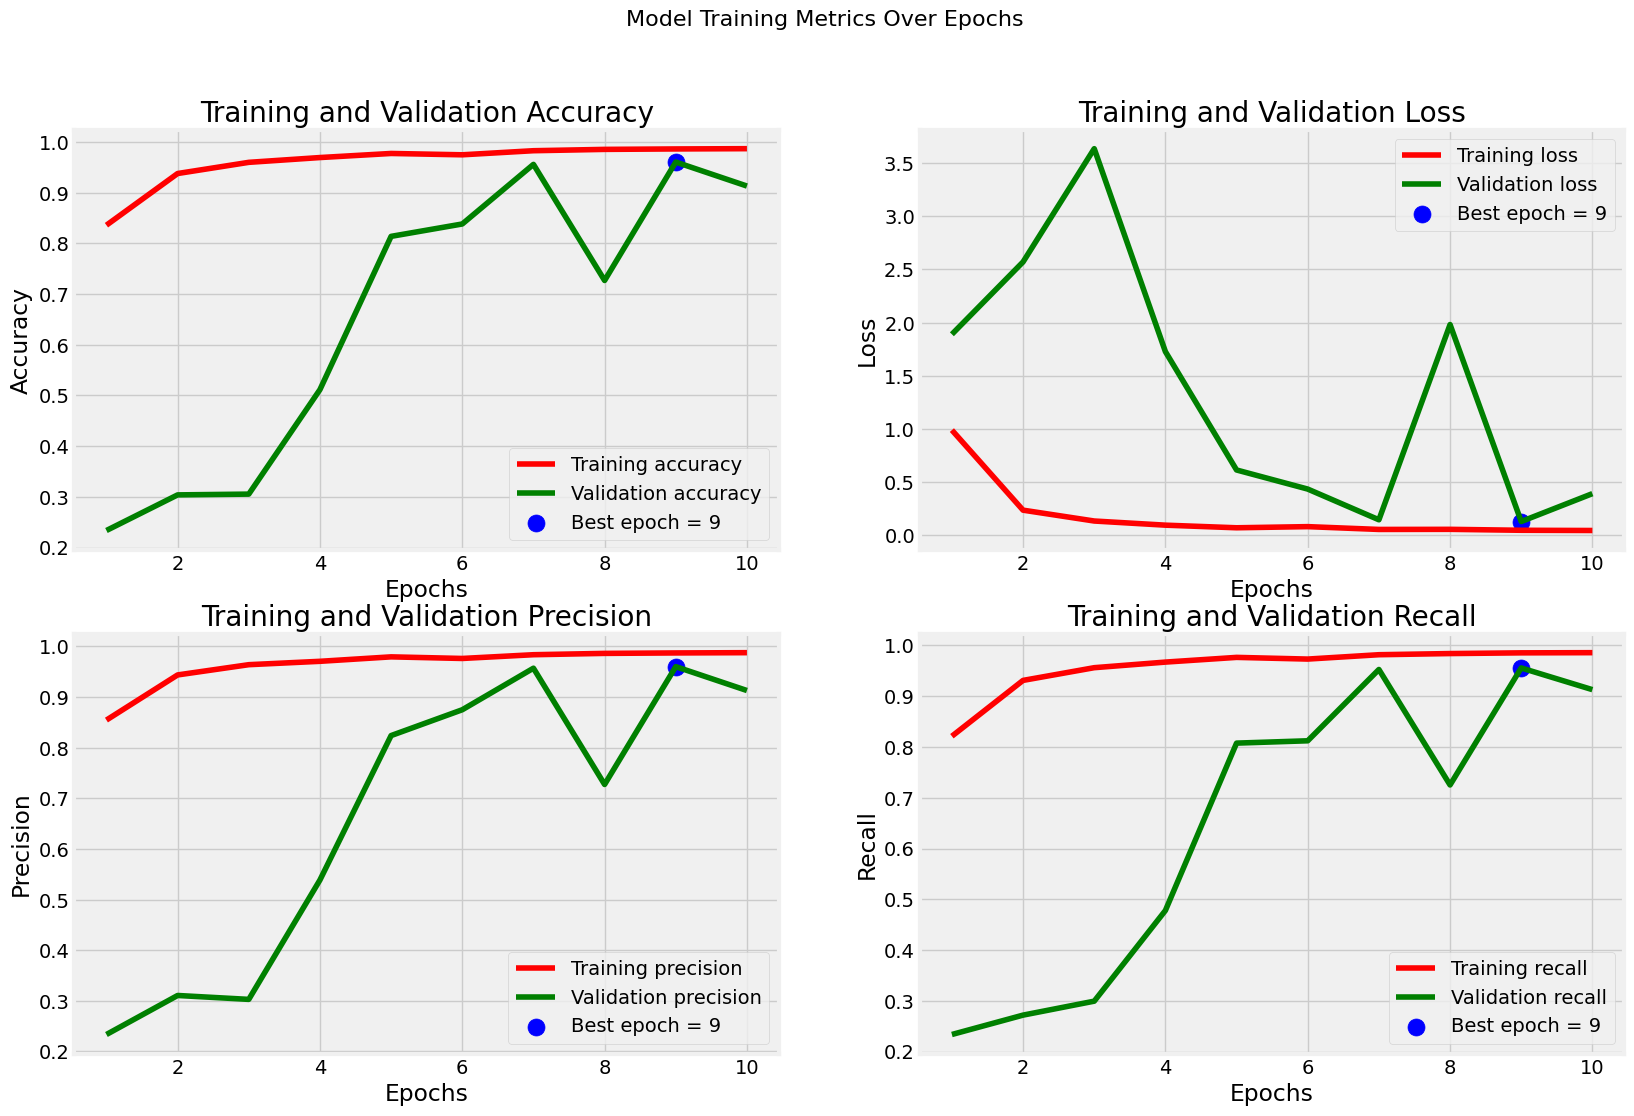

In [15]:
#Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: history_1.history[m] for m in metrics}
val_metrics = {m: history_1.history[f'val_{m}'] for m in metrics}

#Find the bets epochs and respective values
best_epochs = {}
best_values = {}
for m in metrics:
  if m =='loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#Plot the metrics restrived
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label = f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label = f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [16]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Training Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 158ms/step - accuracy: 0.9305 - loss: 0.2164 - precision: 0.9315 - recall: 0.9302
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.8992 - loss: 0.4416 - precision: 0.9003 - recall: 0.8992
 3/41 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9201 - loss: 0.3456 - precision: 0.9266 - recall: 0.9201

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9184 - loss: 0.3324 - precision: 0.9223 - recall: 0.9180
Training Accuracy: 93.05%
Train Loss: 0.2206
Validation Accuracy: 89.92%
Validation Loss: 0.4141


Test Accuracy: 92.53%
Test Loss: 0.2986


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step


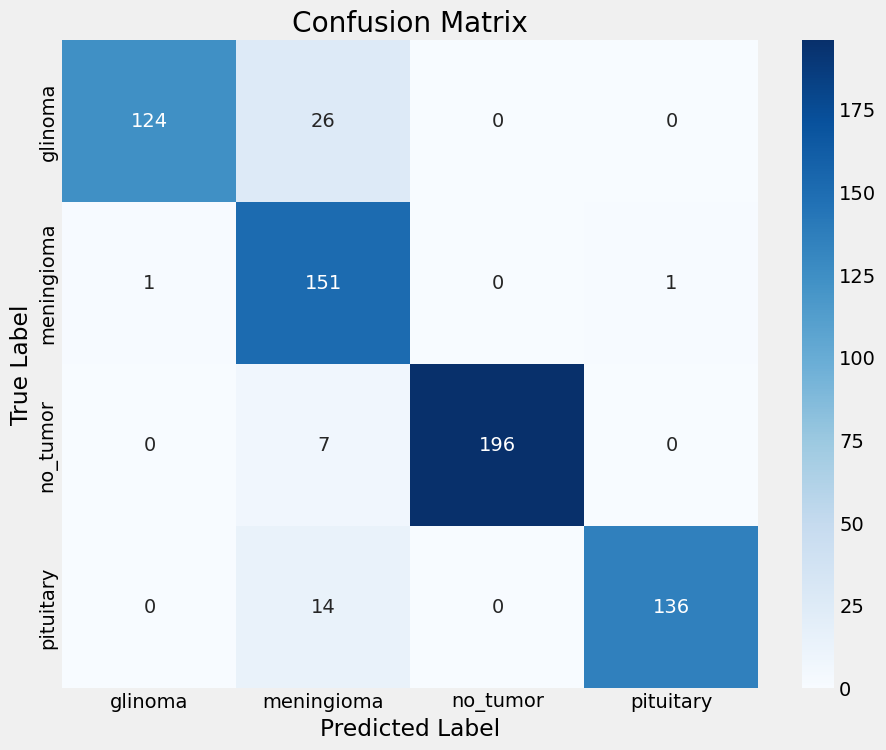

In [17]:
#Visualisation how model is perfomring
preds = model.predict(ts_gen)
#Convertion of prediction to actual labels -> getting us the highest prob to the diff labels
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glinoma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

#Display of confusion matrix

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.values())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save_weights("resnet_model.weights.h5")

# ***CUSTOM CNN***

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [13]:
#Batch size num of img to process at once and resize of img
batch_size = 16

img_size = (224, 224)

img_generator = ImageDataGenerator(rescale=1.0/255.0, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1.0/255.0)


#Training
tr_gen = img_generator.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size)

#Validation
valid_gen = img_generator.flow_from_dataframe(valid_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size)

#Testing
ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path', y_col='Class', batch_size=16, target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [14]:
#Architecture of custom CNN model inpired in ResNet architecture using the skip connections
cnn_model = Sequential()

#COnv layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3) ,activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten cnn model for fully connected layers
cnn_model.add(Flatten())

#Fully connected
cnn_model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax')) # -> OUTPUT LAYER

#compilation
cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

cnn_model.summary()








/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = cnn_model.fit(tr_gen, epochs=10, validation_data=valid_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 98s 215ms/step - accuracy: 0.5622 - loss: 2.2654 - precision: 0.6825 - recall: 0.3756 - val_accuracy: 0.7771 - val_loss: 0.8742 - val_precision: 0.8290 - val_recall: 0.6809
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 63s 174ms/step - accuracy: 0.8068 - loss: 0.7473 - precision: 0.8289 - recall: 0.7758 - val_accuracy: 0.8611 - val_loss: 0.5771 - val_precision: 0.8861 - val_recall: 0.8198
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 62s 173ms/step - accuracy: 0.8640 - loss: 0.5405 - precision: 0.8760 - recall: 0.8473 - val_accuracy: 0.8687 - val_loss: 0.4836 - val_precision: 0.8756 - val_recall: 0.8595
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 62s 174ms/step - accuracy: 0.9029 - loss: 0.4298 - precision: 0.9107 - recall: 0.8919 - val_accuracy: 0.9176 - val_loss: 0.3752 - val_precision: 0.9194 - val_recall: 0.9053
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 62s 174ms/step - accuracy: 0.9311 - loss: 0.3288 - precision: 0.9344 - recall: 0.9245 - val_accuracy: 0.9221 - val_loss

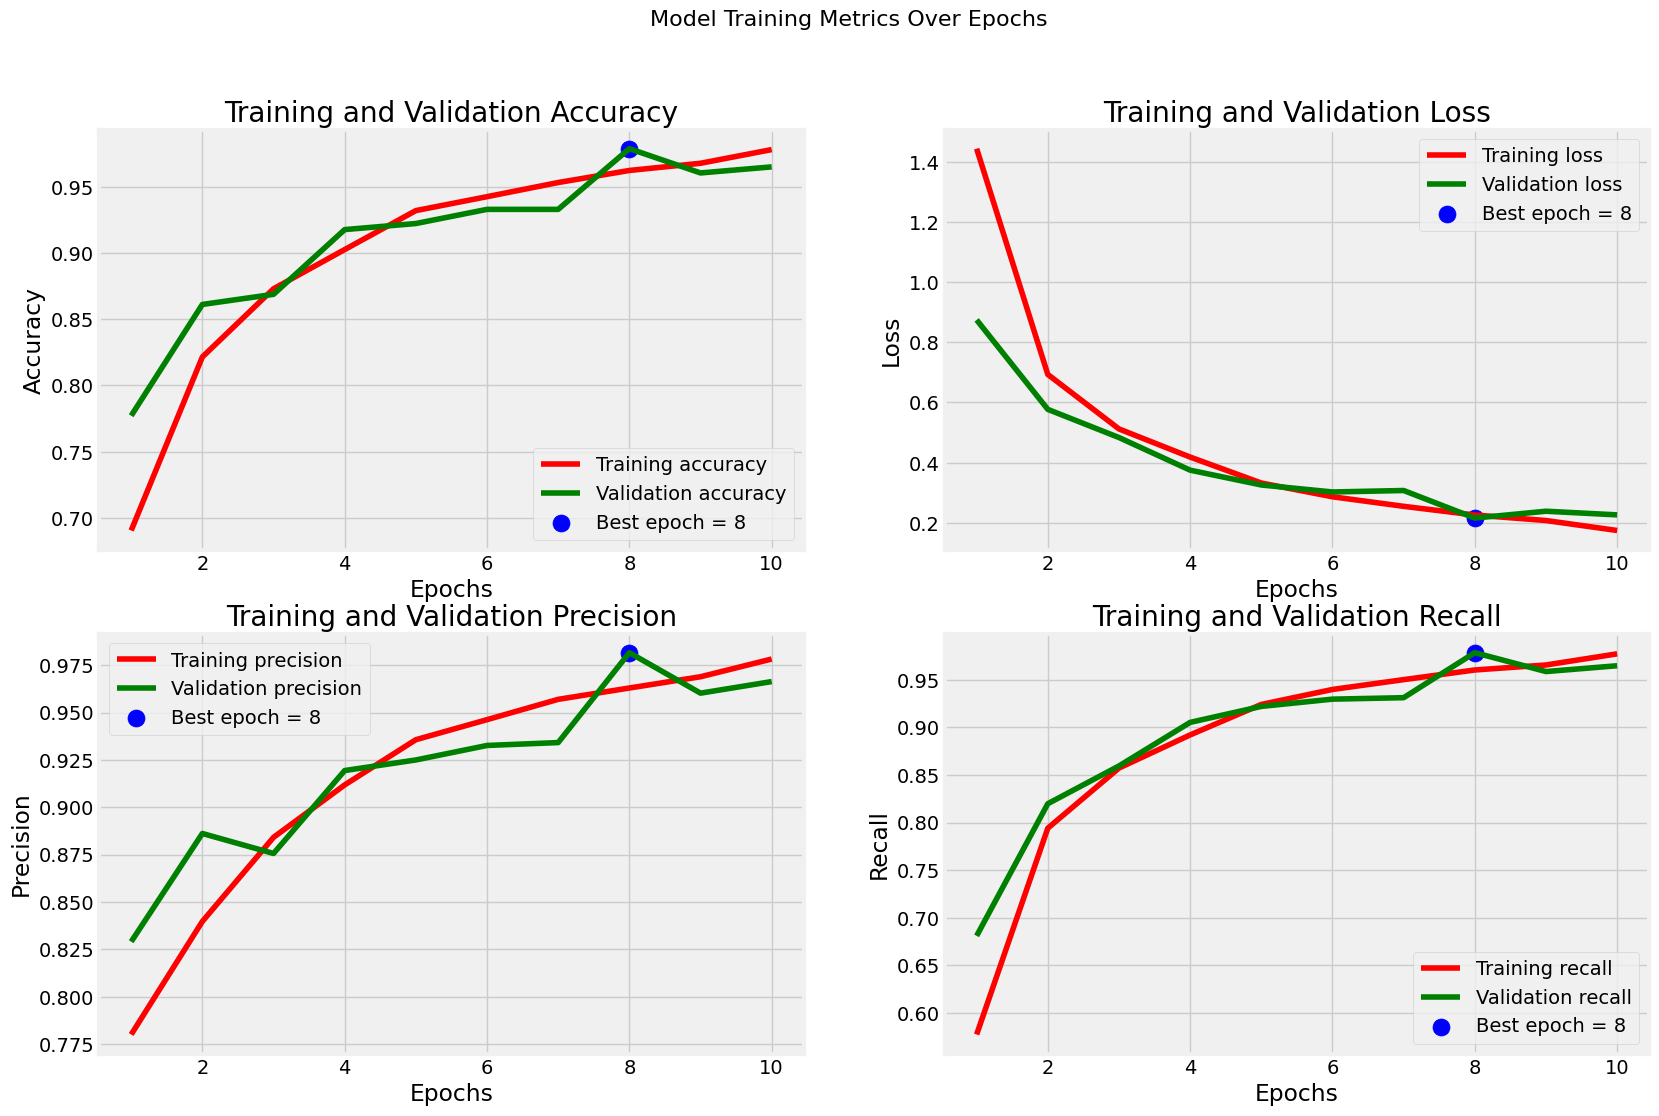

In [16]:
#Get training and validation metrics from history for custom model RestNet based
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

#Find the bets epochs and respective values
best_epochs = {}
best_values = {}
for m in metrics:
  if m =='loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#Plot the metrics restrived
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label = f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label = f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [17]:
#evaluation of model
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Training Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9880 - loss: 0.1496 - precision: 0.9885 - recall: 0.9879
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9592 - loss: 0.2477 - precision: 0.9592 - recall: 0.9592
 3/41 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9375 - loss: 0.3093 - precision: 0.9364 - recall: 0.9201

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9491 - loss: 0.3133 - precision: 0.9488 - recall: 0.9441
Training Accuracy: 98.86%
Train Loss: 0.1447
Validation Accuracy: 96.34%
Validation Loss: 0.2303


Test Accuracy: 95.27%
Test Loss: 0.2769


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


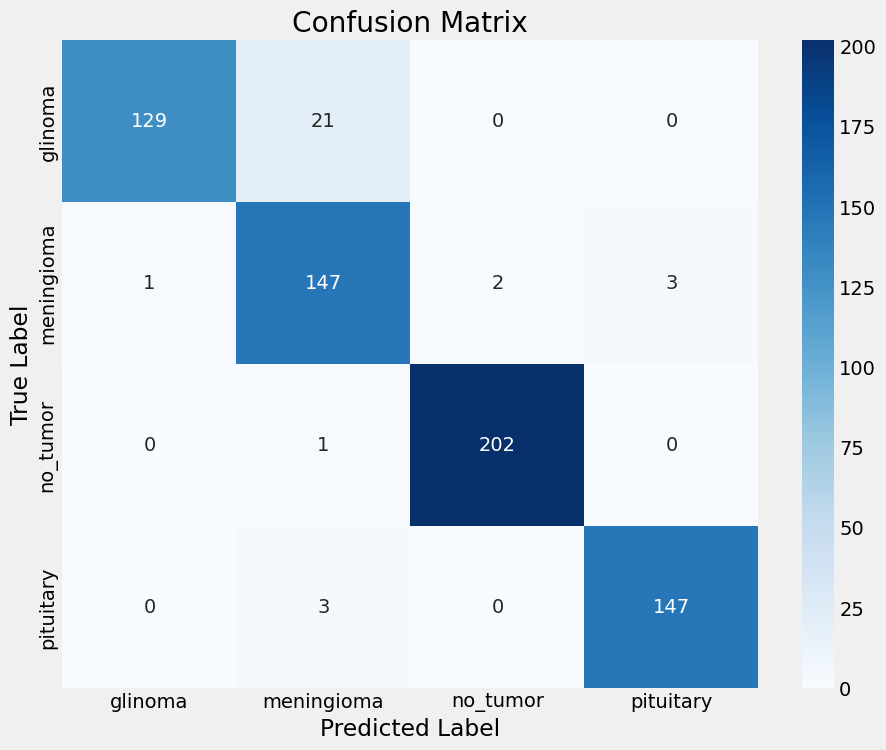

In [18]:
#Visualisation how model is perfomring
preds = cnn_model.predict(ts_gen)
#Convertion of prediction to actual labels -> getting us the highest prob to the diff labels
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glinoma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

#Display of confusion matrix

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.values())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [19]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       150
           1       0.85      0.96      0.90       153
           2       0.99      1.00      0.99       203
           3       0.98      0.98      0.98       150

    accuracy                           0.95       656
   macro avg       0.95      0.95      0.95       656
weighted avg       0.96      0.95      0.95       656



In [20]:
cnn_model.save("cnn_model_ff.h5")

***FINISH OF MODELS DEVELOPMENT AND START OF APP DEVELOPMENT***


In [1]:
!pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.9 MB/s eta 0:00:00


In [2]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata
import os

In [4]:
#API access call
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [5]:
#Helper function to run app on stremlit
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501") # -> command to run te app inside os system call

In [6]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

#Display silency map in app
output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)


#Generate explanation using Gemini API
def generate_explanation(img_path, model_prediction, confidence):
  prompt =f"""You are an expert neuroscientist adn neurologist with a PhD and more that 20 years of experience in teh field. You are tasked with explaining a saliency map of a brain tumo MRI scan.
            The saliency map was generated by a deep learning model that was trained to classify brain tumors as either glioma ,meningioma, pituitary, or no tumor

            The saliency map highlights the regions of the image that the machine learning model is focusing on to make teh predictions.

            The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

            In your response:
            - Explain what regiosn of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted in the light cyan, those are where the model is focusing on.
            - Explain  possible reasons why the mdoel made the prediction it did.
            - Don't mention anything like 'The saliency map highlights teh regions the model is focusing on, which are in light cyan'
            - Keep your explanation to 4 to 5 setences max.
            - Make sure any one on teh ages from 15 to any older can understant the explanation you provide. However don't forget to keep you proffesionalism in you explanation.

            Let's think step by step about this. Verify step by step."""

  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])

  return response.text

#Col 2 image with saliency map
def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()

  #Resizig gradients to match original image size
  gradients = cv2.resize(gradients, img_size)

  #Create a circular mask for the brain area
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0]**2 + (y - center[1])**2 <= radius**2)

  #Apply mask to gradients
  gradients = gradients * mask

  #Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  #Apply a higher treshold
  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0

  #Apply more aggresice smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

  #Create a heatmap overlay with enchanced contrast
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  #Resize heatmap to match original image size
  heatmap = cv2.resize(heatmap, img_size)

  #Superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())

  silency_map_path = f'saliency_maps/{uploaded_file.name}'

  #save the saliency map
  cv2.imwrite(silency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img

#Helper load RESNET
def load_resnet_model(model_path):
    img_shape = (299, 299, 3)  # Input shape for ResNet50
    base_model = tf.keras.applications.ResNet50(
        include_top=False,  # Exclude the top fully connected layers
        weights="imagenet",  # Pretrained weights
        input_shape=img_shape,
        pooling='max'  # Global max pooling
    )

    # Build the custom model
    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')  # 4 neurons for 4 classes
    ])

    # Compile the model with Adamax and custom metrics
    model.compile(
        optimizer=Adamax(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy', Precision(), Recall()]
    )

    # Load weights
    model.load_weights(model_path)

    return model


#Helper custom function to load Xcpetion model
def load_xception_model(model_path):
  img_shape = (299, 299, 3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  #Compilation of model
  model.compile(Adamax(learning_rate=0.001,
                       loss='categorical_crossentropy',
                       metrics=['accuracy', Precision(), Recall()]))
  model.load_weights(model_path)

  return model

#Streamlit UI and interaction components starting point:
st.title("Brain Tumor Classification")

st.write("Upload an image of brain MRI scan to classify")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Selected Model",
      ("Transfer Learning - Xception", "Custom CNN", "Transfer Learning - ResNet50")
  )

  if selected_model == "Transfer Learning -Xception":
    model = load_xception_model('/content/xception_mmodel.weights.h5')
    img_size = (299, 299)

  elif selected_model == "Transfer Learning - ResNet50":
    model = load_resnet_model('/content/resnet_model.weights.h5')
    img_size = (299, 299)

  else:
    model = load_model('/content/cnn_model_ff.h5')
    img_size = (224, 224)

  #Generate prediction of the model, when and img is uploaded and type of model is selected
  labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  #Get the true probabilities for the class with the highest ones
  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions:")
  for label, prob in zip(labels, prediction[0]):
    st.write(f"{label}: {prob:.4f}")

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file, caption='Uploaded Image', use_container_width=True)
  with col2:
    st.image(saliency_map, caption='Saliency Map', use_container_width=True)



  #Classificaion report part
  results_container = st.container()
  results_container = st.container()
  results_container.markdown(
      f"""
      <div style="
  background: linear-gradient(135deg, #1e3c72, #2a5298);
  color: #ffffff;
  padding: 30px;
  border-radius: 15px;
  box-shadow: 0 8px 20px rgba(0, 0, 0, 0.2);
  text-align: center;
  transition: transform 0.3s ease;
  transform-origin: center;
  font-family: Arial, sans-serif;"
  onmouseover="this.style.transform='scale(1.05)';"
  onmouseout="this.style.transform='scale(1)';">
  <div style="
    display: flex;
    flex-direction: column;
    align-items: center;">
    <!-- Icon or Graphic -->
    <div style="
      margin-bottom: 15px;
      width: 60px;
      height: 60px;
      border-radius: 50%;
      background: radial-gradient(circle, #ffffff, #ffde03);
      display: flex;
      align-items: center;
      justify-content: center;
      box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
      <span style="font-size: 24px; font-weight: bold; color: #1e3c72;">⚡</span>
    </div>
    <!-- Title -->
    <h3 style="
      margin-bottom: 10px;
      font-size: 22px;
      text-transform: uppercase;
      letter-spacing: 2px;
      font-weight: 600;">Confidence</h3>
    <!-- Percentage Value -->
    <p style="
      font-size: 48px;
      font-weight: 900;
      color: #FFD700;
      margin: 0;">
      {prediction[0][class_index]:.4%}
    </p>
  </div>
</div>

      """,
      unsafe_allow_html=True
  )

  #Prepare data for plotly chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  #Create teh plotly bar chart
  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  #Customization of chart
  fig.update_layout(
      title='Probabilities for each class',
      xaxis_title='Probability',
      yaxis_title='Class',
      height=400,
      width=600,
      yaxis=dict(autorange='reversed')
  )

  #Add value to the labels of the bars
  for i, prob in enumerate(sorted_probabilities):
    fig.add_annotation(
        x=prob,
        y=i,
        text=f'{prob:.4f}',
        showarrow=False,
        xanchor='left',
        xshift=5
    )

  st.plotly_chart(fig)

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  #Explanation report
  st.write("## Explanation")
  st.write(explanation)

Writing app.py


In [7]:
#Allows running the app in teh background with other tasks

thread = Thread(target=run_streamlit)
thread.start()

In [8]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print('Public URL:', public_url)

Public URL: NgrokTunnel: "https://6cad-35-240-175-85.ngrok-free.app" -> "http://localhost:8501"
